In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class anderson():
    def __init__(self,energy):
        self.energy=energy
        self.lattice_size=len(energy)
        self.H=self.hamiltonian(energy)
        self.Lambda,self.w=np.linalg.eigh(self.H)
    def hamiltonian(self,energy):
        I=np.ones(self.lattice_size-1)
        H=np.diagflat(I,1)+np.diagflat(I,-1)+np.diagflat(energy)
        H[self.lattice_size-1,0]=1
        H[0,self.lattice_size-1]=1
        return H
    def return_amplitude(self,t):
        eigenvalue_array=np.exp(-1j*self.Lambda*t,dtype=np.complex_)
        eigenstate_array=np.abs(self.w[0])**2
        u=eigenvalue_array@eigenstate_array
        return u
    def phi(self,amplitude):
        n=len(amplitude)
        phi=np.zeros(n,dtype=np.complex_)
        phi[0]=amplitude[0]
        for i in range(1,n):
            inverse=amplitude[:i][::-1]
            phi[i]=amplitude[i]-phi[:i]@inverse
        return phi
    def F_n(self,time_array):
        amplitude=[]
        for t in time_array:
            amplitude.append(self.return_amplitude(t))
        F=self.phi(amplitude)
        return np.abs(np.array(F))**2
    def echo(self,times):
        amplitude=[]
        for t in times:
            amplitude.append(self.return_amplitude(t))
        return np.abs(np.array(amplitude,dtype=np.complex_))**2

In [16]:
W=10
time=np.arange(0,100,0.1)
energy=np.random.uniform(-W/2,W/2,int(time[-1]*10))
model=anderson(energy)
print(print(np.argmin(model.Lambda)))
plt.plot(time,model.echo(time))

In [53]:
#Calculating J
K=np.arange(1,200,1,dtype=np.float_)
tau=10
T=tau*K
W=1
lattice_size=int(2.5*K[-1]*tau)
energy=np.random.uniform(-W/2,W/2,lattice_size)
model=anderson(energy)
J=np.zeros(len(T),dtype=np.complex_)
F=model.F_n(T)
for i in range(len(T)):
    J[i]=model.return_amplitude(T[i])

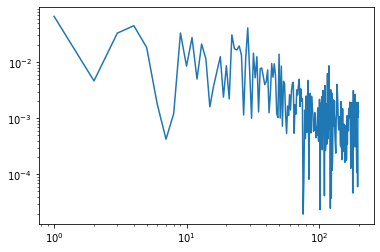

In [56]:
plt.loglog(K,F)

In [8]:
from scipy.special import jv
J0=jv(0,2*T)

In [6]:
#Create a generating function
def generating_function_roots(J):
    J=np.append(J,1)
    J=J[::-1]
    return np.roots(J)

In [57]:
roots0=generating_function_roots(J0)
roots=generating_function_roots(J)

In [58]:
import cmath
roots.dtype
radius = [cmath.polar(root)[0] for root in roots]
print(np.argmin(radius))

198


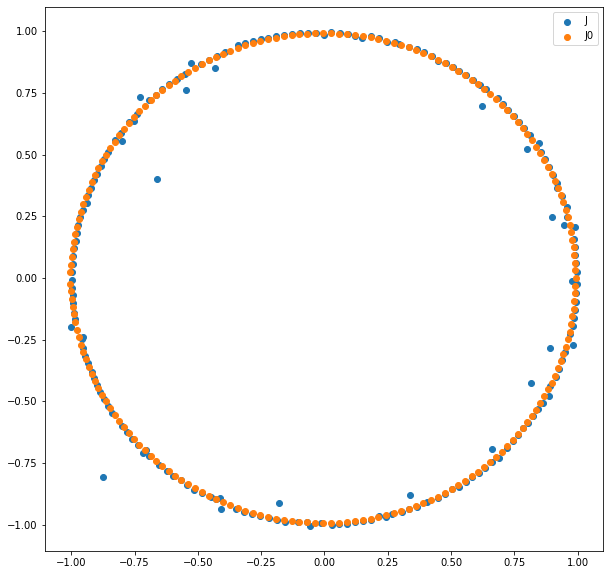

In [60]:
#Plotting
plt.figure(figsize=(10,10))
plt.scatter(roots.real,roots.imag,label='J')
plt.scatter(roots0.real,roots0.imag,label='J0')
plt.legend()
plt.show()

In [52]:
def phi_k(k,roots):
    radius = [cmath.polar(root)[0] for root in roots]
    r=np.argmin(radius)
    return 1/roots[r]**(k+1)
F100=np.abs(phi_k(100,roots))**2
print(F100)

6440171010104097.0


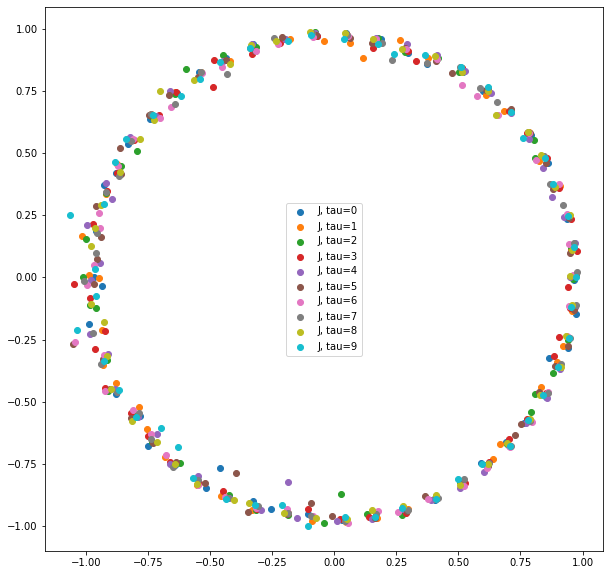

In [67]:
K=np.arange(1,50,1,dtype=np.float_)
plt.figure(figsize=(10,10))
Time=[1.5]
for s in range(10):
    T=1.5*K
    W=3
    lattice_size=int(2.5*K[-1]*tau)
    energy=np.random.uniform(-W/2,W/2,lattice_size)
    model=anderson(energy)
    J=np.zeros(len(T),dtype=np.complex_)
    F=model.F_n(T)
    for i in range(len(T)):
        J[i]=model.return_amplitude(T[i])
    roots=generating_function_roots(J)
    plt.scatter(roots.real,roots.imag,label=f'J, tau={s}')
    plt.legend()